# Two dimensional unequal sampling generalized prolates

This example is not unlike the 2D example of Bronez. We don't have the data, but here goes.

In [1]:
using FFTW, IterTools, Plots, LinearAlgebra, KrylovKit, FINUFFT
using Slepians


""" 

    new_dfn(x, y, bet)

The underlying Kernel function, equation 22-23 in Chave

# Arguments
    - `x::Number` 1-dimensional location
    - `y::Number` 1-dimensional location
    - `bet::Number` 1-dimensional bandwidth

# Outputs
    - Kernel evaluated between the two points x, y
"""
function new_dfn(x, y, bet)
  x == y && return 2*bet
  sin(2 * pi * bet * sqrt(sum(abs2, x - y)))/(pi * sqrt(sum(abs2, (x - y))))
end

function prod_dfn(x, y, bet)
    if typeof(x) <: Number
        return new_dfn(x, y, bet)
    else
        (length(x) != length(y) || length(x) != length(bet)) && error("Lengths of x, y, bet must be the same.")
        return prod(i -> new_dfn(x[i], y[i], bet[i]), 1:length(x))
    end
end

""" 

    efn(x, y, f)

The FT matrix

# Arguments
    - `x::Vector` d-dimensional location
    - `y::Vector` d-dimensional location
    - `f::Vector` d-dimensional frequency

# Outputs
    - Frequency-dependent kernel evaluated between the two points x, y
"""
function efn(x, y, f)
    x == y && return 1.0
    f == 0.0 && return 1.0
    exp(-2.0im * pi * f * sum(x .- y))
end

# Product of efn and dfn
function bfn(x, y, f, bet)
    efn(x, y, f) * prod_dfn(x, y, bet)
end

┌ Info: Precompiling KrylovKit [0b1a1467-8014-51b9-945f-bf0ae24f4b77]
└ @ Base loading.jl:1278
┌ Info: Precompiling Slepians [97caf2bd-9cc0-4738-8821-c8999f46f3c9]
└ @ Base loading.jl:1278
┌ Warning: Package Slepians does not have Statistics in its dependencies:
│ - If you have Slepians checked out for development and have
│   added Statistics as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with Slepians
└ Loading Statistics into Slepians from project dependency, future warnings for Slepians are suppressed.


bfn (generic function with 1 method)

# Warmup: No missing data in 1D

In [2]:
NN = 256
tt = collect(1.0:NN)

fB = 1.0/2 # *ones(d)
fA = 1.0/16 # *ones(d)

f = 0.0

RA = [prod_dfn(xy..., fA) for xy in IterTools.product(tt, tt)]
RB = [bfn(xy..., f, fB) for xy in IterTools.product(tt, tt)]

neig = geneigsolve(x->(RA*x, RB*x), 256, 1, :LM, ishermitian = true, isposdef = true)

v, e = dpss_tapers(NN, 16, 3, :both)


([6.163314097538065e-20 -1.019221710177642e-18 1.1844123829938664e-17; 6.479182135504526e-19 -1.0319532754072649e-17 1.1537941414174936e-16; … ; 6.479182135504338e-19 1.0319532754072807e-17 1.1537941414175212e-16; 6.163314097537885e-20 1.0192217101776574e-18 1.1844123829938947e-17], [0.9999999999999996, 1.0, 1.0000000000000013])

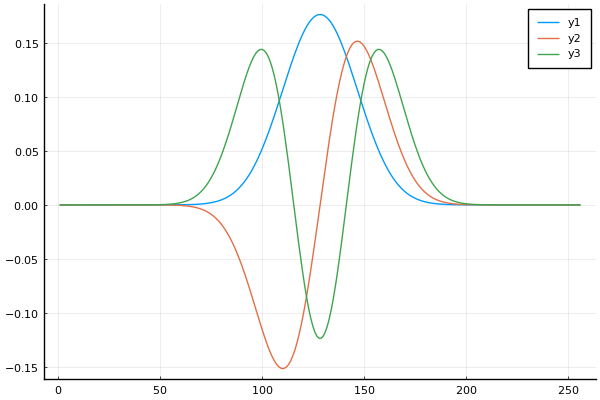

In [4]:
pyplot(); plot(v)

# Warmup: Missing data problem in 1D

In [5]:
NN = 256
tt = (1.0:NN).^(1.05)

fB = 1.0/2 # *ones(d)
fA = 1.0/16 # *ones(d)

f = 0.0

RA = [prod_dfn(xy..., fA) for xy in IterTools.product(tt, tt)]
RB = [bfn(xy..., f, fB) for xy in IterTools.product(tt, tt)]

neig = geneigsolve(x->(RA*x, RB*x), 256, 1, :LM, ishermitian = true, isposdef = true)

([0.999999999999678], [[2.359745196415433e-6, 1.0680675261135046e-5, 3.3203183482462656e-5, 8.508012513462111e-5, 0.00019179668438384955, 0.0003939141127823217, 0.0007518404466487017, 0.0013514757653644667, 0.0023088174076357306, 0.0037736386199324202  …  -0.0015585244740220288, -0.0010521432444025151, -0.0006719207804649381, -0.00040316488855004297, -0.00022505809634764374, -0.00011518804827105864, -5.2836809689511985e-5, -2.0880322748663573e-5, -6.556503501206378e-6, -1.3075364460948195e-6]], ConvergenceInfo: no converged values after 100 iterations and 3101 applications of the linear map;
norms of residuals are given by (7.142131570074637e-8,).
)

In [6]:
lam_orth, u_orth = gpss_orth(fA, 1, tt, 0.0, beta = fB)

lam, u = gpss(fA, 1, tt, 0.0, beta = fB)

([1.0000000000000036], Complex{Float64}[5.8083894861129e-9 - 0.0im; 3.097101154119072e-8 - 0.0im; … ; 2.048591742102478e-8 - 0.0im; 7.484937915658824e-10 - 0.0im], Cholesky{Complex{Float64},Array{Complex{Float64},2}}(Complex{Float64}[1.0 + 0.0im -0.06534534398152574 - 0.0im … -0.0009102308338316301 - 0.0im 0.0005697795924405583 + 0.0im; 1.0 + 0.0im 0.9978627090035663 + 0.0im … 0.000773787309168558 + 0.0im -0.000688105497034729 - 0.0im; … ; 1.0 + 0.0im 1.0 + 0.0im … 0.9710556103148197 + 0.0im -0.2005260071180715 + 0.0im; 1.0 + 0.0im 1.0 + 0.0im … 1.0 + 0.0im 0.9710520812214699 + 0.0im], 'U', 0))

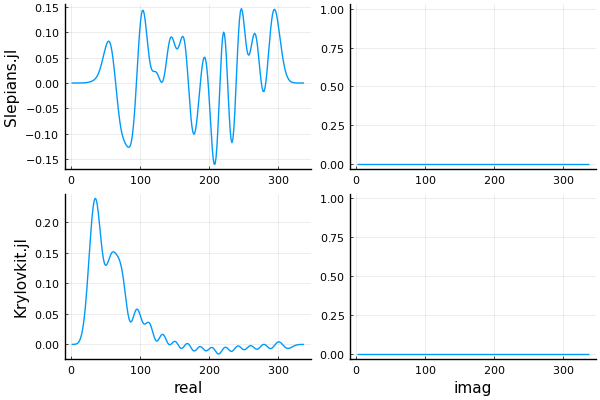

In [7]:
plot(plot(tt, real.(u)), plot(tt, imag.(u)), plot(tt, real.(neig[2][1])), plot(tt, imag.(neig[2][1])),
    layout = (2,2), xlabel = ["" "" "real" "imag"], ylabel = ["Slepians.jl" "" "Krylovkit.jl" ""], 
    legend = false)

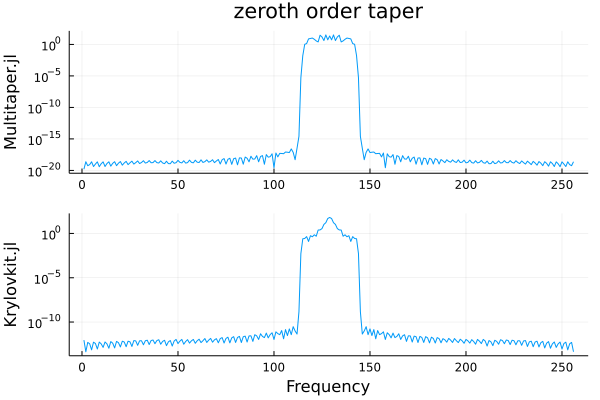

In [6]:
K = 1
w = fA
freqs = LinRange(-0.5, 0.5, NN+1)[1:NN]

ftsleps = mapreduce(k->abs2.(nufft1d3(2*pi*tt, ComplexF64.(u[:,k]), -1, 1e-15, collect(freqs))),hcat, 1:K)

ftsleps2 = abs2.(nufft1d3(2*pi*tt, ComplexF64.(neig[2][1]), -1, 1e-15, collect(freqs)))

plot(plot(ftsleps, yscale = :log10), plot(ftsleps2, yscale = :log10), layout = (2,1), legend = false,
    title = ["zeroth order taper" ""], xlabel = ["" "Frequency"], ylabel = ["Multitaper.jl" "Krylovkit.jl"])

# Warmup: Missing data problem in 2D

This is like the data in the Chave paper, only 2D. Gaps. 

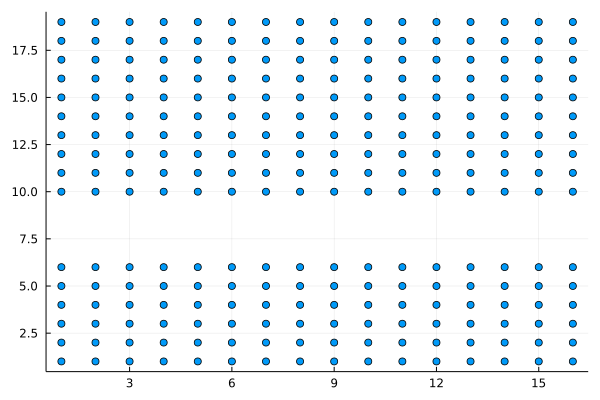

In [7]:
N1 = 16
N2 = 16
t1 = collect(1:N1)
t2 = collect(1:(N2 + 3))[vcat(collect(1:6), collect(10:19))]

mdpts = [(r,t) for r in t1 for t in t2]
mdlocs = [[r,t] for r in t1 for t in t2]

scatter(mdpts, legend = false)

In [8]:
fB = 1.0/2 
fA = 1.0/8 

RA = [dfn(xy..., fA) for xy in IterTools.product(mdlocs, mdlocs)]
RB = [dfn(xy..., fB) for xy in IterTools.product(mdlocs, mdlocs)]

gs = geneigsolve(x->(RA*x, RB*x), 256, 1, :LM, ishermitian = true, isposdef = true) #, howmany = 1, which = :LM, issymmetric = true, T = ComplexF64)

([0.8482276267317761], [[1502.7107591209435, -1102.8003800426707, 212.77073270166278, 835.7823569378639, 442.77271950051494, -159.80305074775686, 674.2164948711874, 574.7208599445861, 208.1154408466496, -85.16141473412976  …  664.1744897616038, 583.9347535018039, 207.1836341981555, -81.69764798800547, -5.702963999157324, 448.02142727353925, 747.7087237214885, 131.31618130917818, -1115.8206148397949, 1472.899218398858]], ConvergenceInfo: no converged values after 100 iterations and 3101 applications of the linear map;
norms of residuals are given by (1.0088459923299534e-5,).
)

In [9]:
gs[2]

1-element Array{Array{Float64,1},1}:
 [1502.7107591209435, -1102.8003800426707, 212.77073270166278, 835.7823569378639, 442.77271950051494, -159.80305074775686, 674.2164948711874, 574.7208599445861, 208.1154408466496, -85.16141473412976  …  664.1744897616038, 583.9347535018039, 207.1836341981555, -81.69764798800547, -5.702963999157324, 448.02142727353925, 747.7087237214885, 131.31618130917818, -1115.8206148397949, 1472.899218398858]

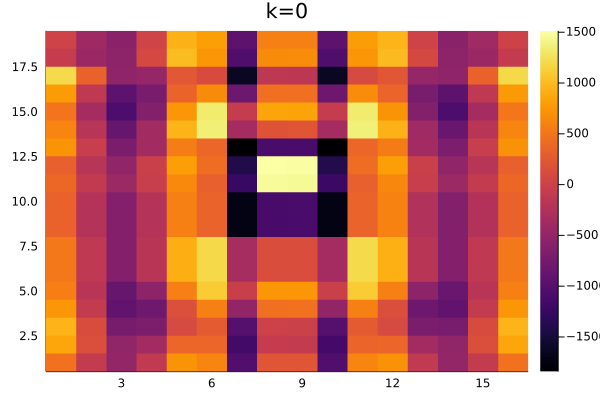

In [10]:
h1 = heatmap(t1, t2, fftshift(reshape(gs[2][1], (16, 16))), title = "k=0")

# General problem: Unequal spacing in array

Here is an array similar to the example in the original Bronez paper. 

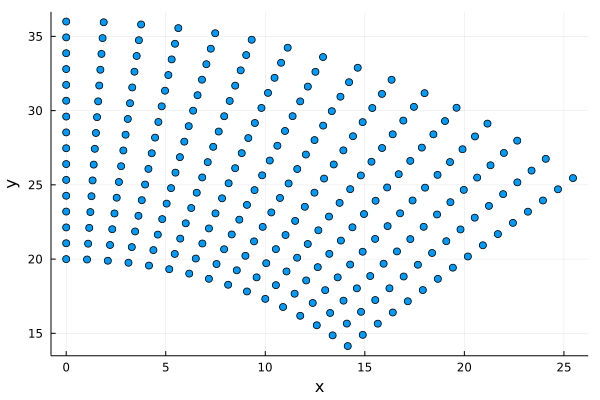

In [12]:
# Set up the array
N1 = 16
N2 = 16

# generate 32 ocncentric circles
rad = collect(LinRange(20,36.0,N1))
thet = collect(LinRange(0.0,45,N2)*pi/180)

pts1 = [(r*sin(t), r*cos(t)) for r in rad for t in thet]

locs1 = [[r*sin(t), r*cos(t)] for r in rad for t in thet]

scatter(pts1, legend = false, xlabel="x", ylabel="y")

In [14]:
# Get the RA and RB matrices, simplifications are provided by Chave, 2020 p 8
d = 2

fB = 1.0/2 # *ones(d)
fA = 1.0/8 # *ones(d)

f = 0.1

RA = [prod_dfn(xy..., [fA, fA]) for xy in IterTools.product(locs1, locs1)]
RB = [bfn(xy..., f, fB) for xy in IterTools.product(locs1, locs1)]

neig = geneigsolve(x->(RA*x, RB*x), 256, 1, :LM, ishermitian = true, isposdef = true) #, howmany = 1, which = :LM, issymmetric = true, T = ComplexF64)

LoadError: [91mLengths of x, y, bet must be the same.[39m

In [92]:
xx = hcat(locs1...)

2×256 Array{Float64,2}:
  0.0   1.04672   2.09057   3.12869  …  21.1603  22.6555  24.0887  25.4558
 20.0  19.9726   19.8904   19.7538      29.1246  27.9773  26.7532  25.4558

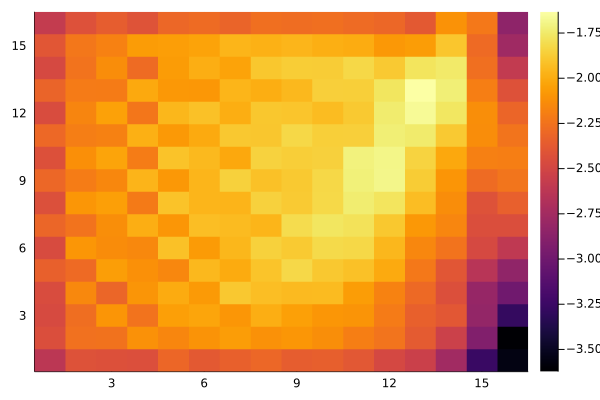

In [93]:
# This is deformed though, so it is hard to visualize with a heatmap
heatmap(log10.(abs2.(reshape(neig[2][1], (16, 16)))))

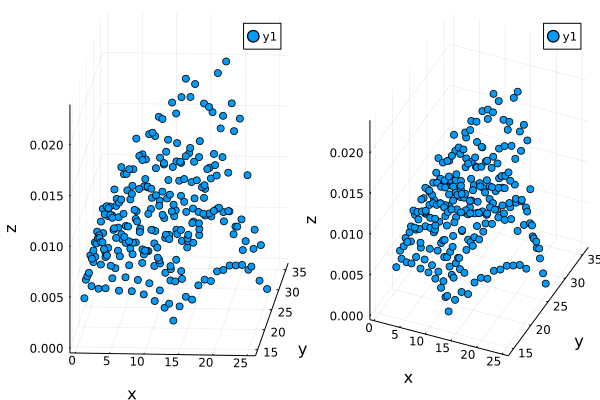

In [94]:
# could do a mesh too
pa = scatter(xx[1,:], xx[2,:], abs2.(neig[2][1]), camera = (10, 35), xlabel = "x", ylabel = "y", zlabel="z")

pb = scatter(xx[1,:], xx[2,:], abs2.(neig[2][1]), camera = (30, 50), xlabel = "x", ylabel = "y", zlabel="z")

plot(pa, pb, layout = (1,2))

In [95]:
freqs1 = LinRange(-1, 1.0, N1)
freqs2 = LinRange(-1, 1.0, N2)

ff = vcat([[xy[1] xy[2]] for xy in IterTools.product(freqs1, freqs2)][:]...)

XX = abs2.(nufft2d1(2*pi*(xx[1,:] .- 12.5)/25., 2*pi*(xx[2,:] .- 12.5)/25., 
        ComplexF64.(neig[2][1]), -1, 1e-15, 2*N1, 2*N2))

32×32 Array{Float64,2}:
 3.30405      0.0241755   0.126214    …  4.15169     2.32213      1.65064
 0.00118194   0.472299    0.0310213      3.96081     2.80715      1.67785
 0.65207      0.0130634   0.201691       3.93121     2.09723      0.475184
 0.102701     0.364703    0.0320801      2.34423     0.377021     0.00563304
 0.278748     0.0508158   0.164266       0.400857    0.0147944    0.0273646
 0.314742     0.102492    0.0441563   …  0.0129148   0.0198159    0.00478458
 0.0014474    0.240029    0.0217743      0.00881079  0.0139364    0.0683364
 0.223297     0.01905     0.172678       0.0334311   0.00797946   0.0577684
 0.207742     0.10012     0.0501621      0.250509    0.00467243   0.0154235
 0.0156784    0.17414     0.00520586     0.10607     0.167524     0.0128153
 0.0568209    0.0709698   0.0264155   …  0.170826    0.00762378   0.069619
 0.095744     0.00775685  0.012227       0.140557    0.129168     0.00551442
 0.109133     0.00350818  0.0027324      0.107553    0.0254625    0

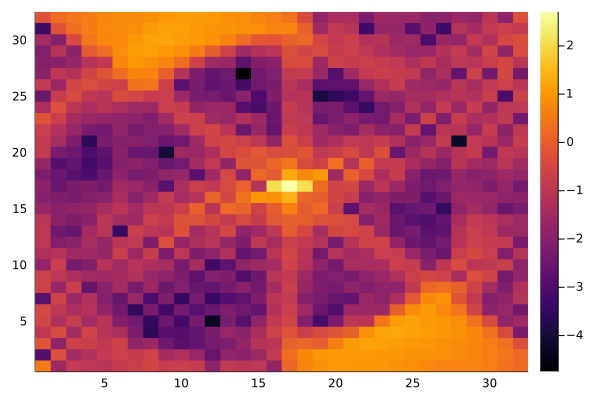

In [96]:
heatmap(log10.(XX))